# Task_2

# `MOVIE RATING PREDICTION WITH PYTHON`

Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

## Load Data

In [62]:
#import libraries

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [63]:
movies=pd.read_csv('../CODSOFT/IMDb Movies India.csv',encoding='ISO-8859-1')
movies.sample(20)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15221,Yeh Dil Ramta Jogi,(2014),98 min,"Action, Crime, Drama",6.4,10,Swaroop Kanchi,Swaroop Kanchi,Cajole Kapoor,Anil Kumar
12393,Sanjh Aur Savera,(1964),134 min,"Drama, Family",7.0,50,Hrishikesh Mukherjee,Meena Kumari,Guru Dutt,Mehmood
12358,SANDHWANAM,(1991),NaN,Drama,NaN,NaN,Siby Malayil,NaN,NaN,NaN
13723,Takkar,(1980),157 min,Drama,5.4,36,K. Bapaiah,Sanjeev Kumar,Jeetendra,Zeenat Aman
3430,Darawani Haveli,(1997),NaN,Horror,NaN,NaN,Anil Dhawan,Goga Kapoor,Anjan Srivastav,NaN
5009,Ghar,(1978),121 min,"Drama, Romance",7.0,192,Manik Chatterjee,Gulzar,Vinod Mehra,Rekha
1079,Anjaana Anjaani,(2010),151 min,"Comedy, Drama, Musical",5.8,"6,416",Siddharth Anand,Priyanka Chopra Jonas,Aubrey K. Miller,Ranbir Kapoor
7980,Laal Rang,(2016),147 min,"Comedy, Crime, Drama",8.0,"4,340",Syed Ahmad Afzal,Randeep Hooda,Akshay Oberoi,Rajniesh Duggall
7777,Kissi Se Na Kehna,(1983),140 min,"Comedy, Romance",7.4,603,Hrishikesh Mukherjee,Farooq Shaikh,Deepti Naval,Utpal Dutt
6776,Jodi Kya Banayi Wah Wah Ramji,(2003),NaN,Comedy,3.8,47,Raman Kumar,Rotem Bar,Rakesh Bedi,Avtar Gill


In [64]:
movies.info()

movies.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


(15509, 10)

**Observation**
 1. `Name,Genre,Director,Actor 1,Actor 2,Actor 3` Data type is correct,`Year,Duration,Votes` Data type is not correct.
 2. Some missing values in this datasest.
-----------
**What we can do**
 1. Change the data types as per column values.
 2. `Duration` column convert into `int` and rename column name =`Duration_in_min`,so any reader can easily identify the column value in minutes.And in this column we replace `min`=` `,if we do this we can more easy to find more insights and easy to use this column.
 3. `Year` column convert into `int`,and replace `()` into ` `.
 4. `Votes` column convert into `int`.and replace `,` into ` `. 

In [65]:
# statistical summary
movies.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


## Data Correction/Errors Handling.

**Duration column**

In [66]:
movies['Duration'].unique()


array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [67]:
replacae_min=movies['Duration'].replace('min','',regex=True,inplace=True)
movies['Duration']

0         NaN
1        109 
2         90 
3        110 
4        105 
         ... 
15504     NaN
15505    129 
15506     NaN
15507     NaN
15508    130 
Name: Duration, Length: 15509, dtype: object

* Change its type `Object` to `Int`.

In [68]:
movies['Duration'] = pd.to_numeric(movies['Duration'], errors='coerce')

movies['Duration'] = movies['Duration'].astype('Int64')
movies['Duration']

0        <NA>
1         109
2          90
3         110
4         105
         ... 
15504    <NA>
15505     129
15506    <NA>
15507    <NA>
15508     130
Name: Duration, Length: 15509, dtype: Int64

* Rename `Duration` to `Duration_in_mint`

In [69]:
rename_duration=movies.rename(columns={'Duration':'Duration_in_mint'},inplace=True)
movies

,Name,Year,Duration_in_mint,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,<NA>,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),<NA>,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),<NA>,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),<NA>,Action,NaN,NaN,NaN,NaN,NaN,NaN


**Year column**

In [70]:
movies['Year'].unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

* Replace `()` with ` `.

In [71]:
replacae_openbracket=movies['Year'].replace('\(','',regex=True,inplace=True)
replacae_closebracket=movies['Year'].replace('\)','',regex=True,inplace=True)
movies['Year']

0         NaN
1        2019
2        2021
3        2019
4        2010
         ... 
15504    1988
15505    1999
15506    2005
15507    1988
15508    1998
Name: Year, Length: 15509, dtype: object

* Convert type `Object` to `Int`.

In [72]:
movies['Year'] = movies['Year'].astype('Int64')
movies['Year']

0        <NA>
1        2019
2        2021
3        2019
4        2010
         ... 
15504    1988
15505    1999
15506    2005
15507    1988
15508    1998
Name: Year, Length: 15509, dtype: Int64

**Votes column**

In [73]:
movies['Votes'].unique()

array([nan, '8', '35', ..., '70,344', '408', '1,496'], dtype=object)

* Convert type `Object` to `Int`.

In [74]:
movies['Votes'] = pd.to_numeric(movies['Votes'], errors='coerce')
movies['Votes'] = movies['Votes'].astype(float).astype('Int64')
movies['Votes'].dtype

Int64Dtype()

* Replce `,` with ` `.

In [75]:
replace_comma=movies['Votes'].replace(',','',inplace=True)
movies['Votes'].unique

<bound method Series.unique of 0        <NA>
1           8
2        <NA>
3          35
4        <NA>
         ... 
15504      11
15505     655
15506    <NA>
15507    <NA>
15508      20
Name: Votes, Length: 15509, dtype: Int64>

**Lets check the data types again**

In [76]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              15509 non-null  object 
 1   Year              14981 non-null  Int64  
 2   Duration_in_mint  7240 non-null   Int64  
 3   Genre             13632 non-null  object 
 4   Rating            7919 non-null   float64
 5   Votes             6548 non-null   Int64  
 6   Director          14984 non-null  object 
 7   Actor 1           13892 non-null  object 
 8   Actor 2           13125 non-null  object 
 9   Actor 3           12365 non-null  object 
dtypes: Int64(3), float64(1), object(6)
memory usage: 1.2+ MB


**All errors is removed**

## Handling missing values

In [77]:
movies.isnull().mean()*100

Name                 0.000000
Year                 3.404475
Duration_in_mint    53.317429
Genre               12.102650
Rating              48.939326
Votes               57.779354
Director             3.385131
Actor 1             10.426204
Actor 2             15.371720
Actor 3             20.272100
dtype: float64

* As we see some columns has `>45%` missing values and some columns has less missing values.
  1. We impute numericals column with mean or median,also check distribution which and some techniques to check which imputation is better for numericals column.
  2. Categoricals impute woth mode,also same check the possiblities like we check in numerical columns.
  3. I checked droping all the missing values if we do this >50% data is removed so this is not better option.

**Lets first impute all numericlas columns**

**`Year`**

In [78]:
print('No if mssing values',movies['Year'].isnull().sum())
print('% of misssing values',movies['Year'].isnull().mean()*100)

No if mssing values 528
% of misssing values 3.404474821071636


In [79]:
movies['Year']=movies['Year'].round().astype(float)

t_mean=movies['Year'].mean()
movies['year_mean']=movies['Year'].fillna(t_mean)

t_median=movies['Year'].median()
movies['year_median']=movies['Year'].fillna(t_median)

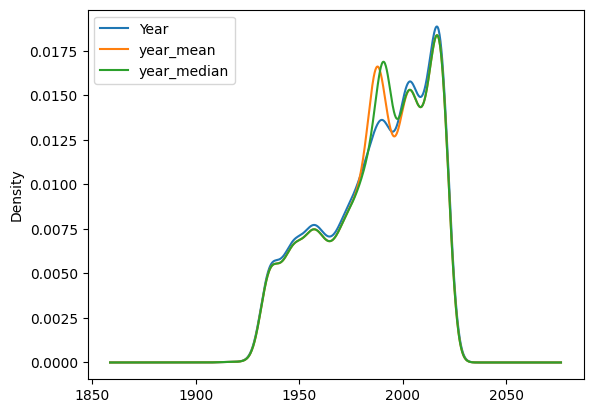

In [80]:
plt.figure
ax=plt.subplot(1,1,1)

movies['Year'].plot(kind='kde')
movies['year_mean'].plot(kind='kde')
movies['year_median'].plot(kind='kde')

ax.legend()

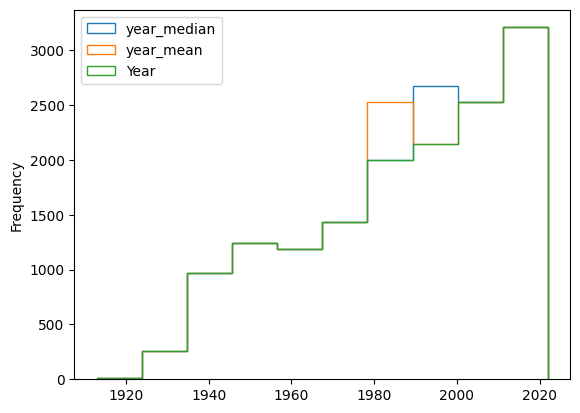

In [81]:
plt.figure
ax=plt.subplot(1,1,1)

movies['year_median'].plot(kind='hist',histtype='step', stacked=True, fill=False)
movies['year_mean'].plot(kind='hist',histtype='step', stacked=True, fill=False)
movies['Year'].plot(kind='hist',histtype='step', stacked=True, fill=False)


ax.legend()

* So the distribution is ok for imputing them with else mean or median.

In [82]:
movies['Year'].fillna(t_median,inplace=True)
movies['Year']

0        1991.0
1        2019.0
2        2021.0
3        2019.0
4        2010.0
          ...  
15504    1988.0
15505    1999.0
15506    2005.0
15507    1988.0
15508    1998.0
Name: Year, Length: 15509, dtype: float64

**Duration_in_mint**

In [83]:
movies['Duration_in_mint']=movies['Duration_in_mint'].round().astype(float)

d_mean=movies['Duration_in_mint'].mean()
movies['Duration_mean']=movies['Duration_in_mint'].fillna(d_mean)

d_median=movies['Duration_in_mint'].median()
movies['Duration_median']=movies['Duration_in_mint'].fillna(d_median)

**Genre column**

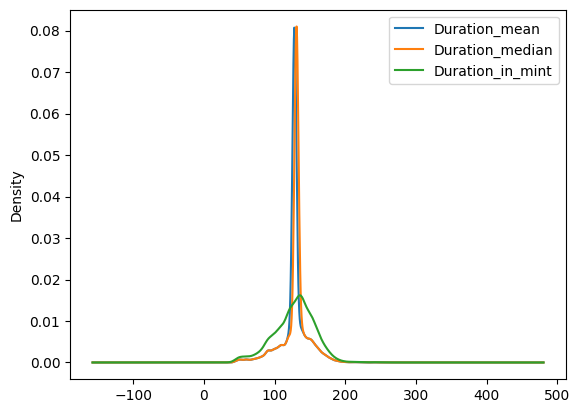

In [84]:
plt.figure()
ax=plt.subplot(1,1,1)

movies['Duration_mean'].plot(kind='kde')
movies['Duration_median'].plot(kind='kde')
movies['Duration_in_mint'].plot(kind='kde')

ax.legend()

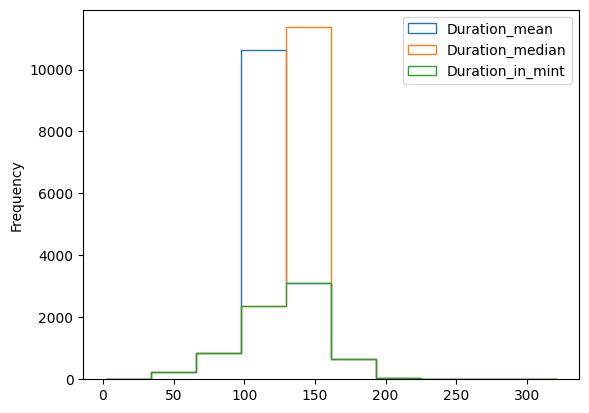

In [85]:
plt.figure
ax=plt.subplot(1,1,1)

movies['Duration_mean'].plot(kind='hist',histtype='step', stacked=True, fill=False)
movies['Duration_median'].plot(kind='hist',histtype='step', stacked=True, fill=False)
movies['Duration_in_mint'].plot(kind='hist',histtype='step', stacked=True, fill=False)

ax.legend()


In [86]:
movies['Duration_in_mint'].fillna(d_mean,inplace=True)

**Rating**

In [87]:
d_mean=movies['Rating'].mean()
movies['r_mean']=movies['Rating'].fillna(d_mean)

d_median=movies['Rating'].median()
movies['r_median']=movies['Rating'].fillna(d_median)

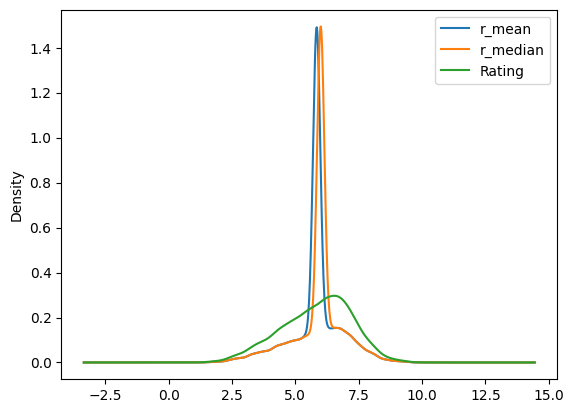

In [88]:
plt.figure()
ax=plt.subplot(1,1,1)

movies['r_mean'].plot(kind='kde')
movies['r_median'].plot(kind='kde')
movies['Rating'].plot(kind='kde')

ax.legend()

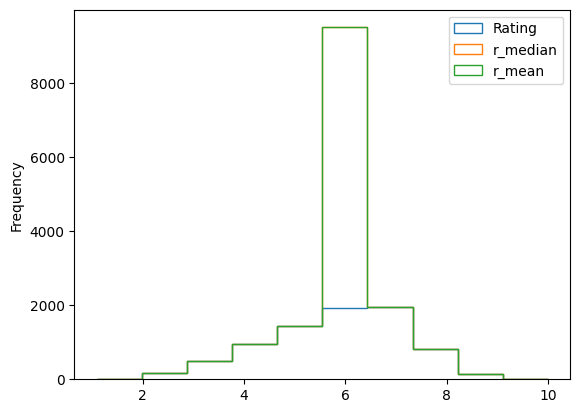

In [89]:
plt.figure
ax=plt.subplot(1,1,1)

movies['Rating'].plot(kind='hist',histtype='step', stacked=True, fill=False)
movies['r_median'].plot(kind='hist',histtype='step', stacked=True, fill=False)
movies['r_mean'].plot(kind='hist',histtype='step', stacked=True, fill=False)

ax.legend()


In [90]:
movies['Rating'].fillna(d_median,inplace=True)

**Votes**

In [91]:
movies['Votes']=movies['Votes'].round().astype(float)

v_mean=movies['Votes'].mean()
movies['v_mean']=movies['Votes'].fillna(d_mean)

v_median=movies['Votes'].median()
movies['v_median']=movies['Votes'].fillna(d_median)

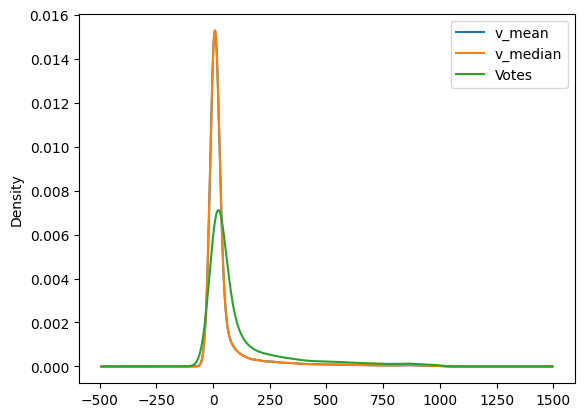

In [92]:
plt.figure()
ax=plt.subplot(1,1,1)

movies['v_mean'].plot(kind='kde')
movies['v_median'].plot(kind='kde')
movies['Votes'].plot(kind='kde')

ax.legend()

In [93]:
movies['Votes'].fillna(v_median,inplace=True)

In [94]:
movies.drop(['year_mean','year_median','Duration_mean','Duration_median','r_mean','r_median','v_mean','v_median'],axis=1,inplace=True)
movies

,Name,Year,Duration_in_mint,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991.0,128.126519,Drama,6.0,35.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.000000,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.000000,"Drama, Musical",6.0,35.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.000000,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.000000,Drama,6.0,35.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988.0,128.126519,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999.0,129.000000,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005.0,128.126519,Action,6.0,35.0,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988.0,128.126519,Action,6.0,35.0,NaN,NaN,NaN,NaN


In [95]:
movies = movies.astype({'Year': 'int', 'Duration_in_mint': 'int', 'Rating': 'int', 'Votes': 'int'})
movies

,Name,Year,Duration_in_mint,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991,128,Drama,6,35,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",6,35,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,6,35,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,128,Action,4,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,"Action, Drama",4,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005,128,Action,6,35,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988,128,Action,6,35,NaN,NaN,NaN,NaN


In [96]:
print(movies['Genre'].mode())
print(movies['Actor 1'].mode())
print(movies['Actor 2'].mode())
print(movies['Actor 3'].mode())

0    Drama
Name: Genre, dtype: object
0    Ashok Kumar
Name: Actor 1, dtype: object
0    Rekha
Name: Actor 2, dtype: object
0    Pran
Name: Actor 3, dtype: object


<Figure size 2000x2000 with 0 Axes>

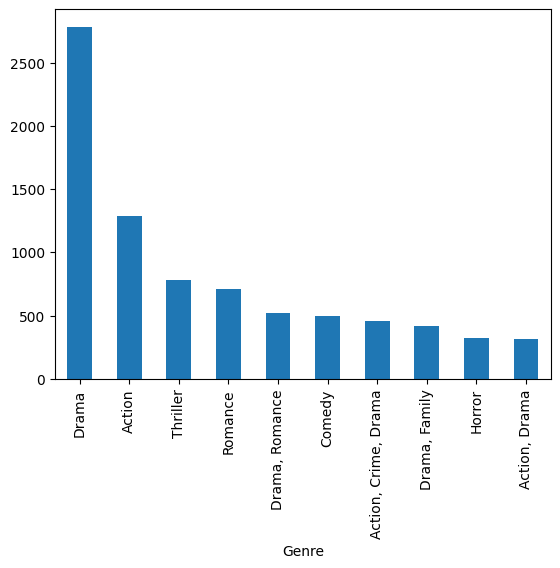

In [97]:
plt.figure(figsize=(20,20))
ax=plt.subplots(1,1)
movies['Genre'].value_counts().nlargest(10).plot(kind='bar')
plt.show()

<Figure size 2000x2000 with 0 Axes>

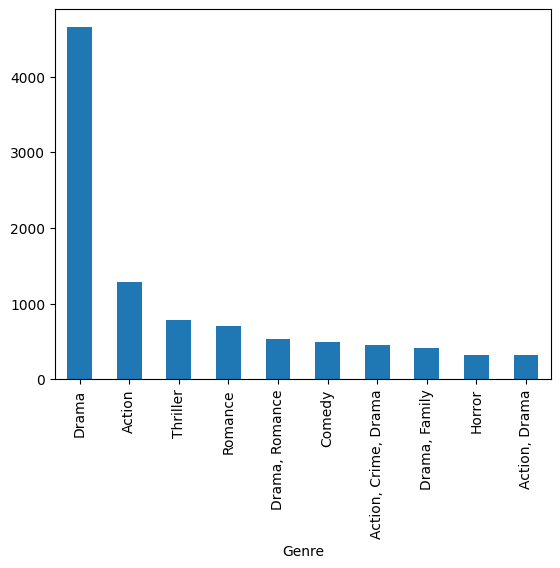

In [98]:
movies['Genre'].fillna('Drama',inplace=True)
plt.figure(figsize=(20,20))
ax=plt.subplots(1,1)
movies['Genre'].value_counts().nlargest(10).plot(kind='bar')
plt.show()

<Figure size 2000x2000 with 0 Axes>

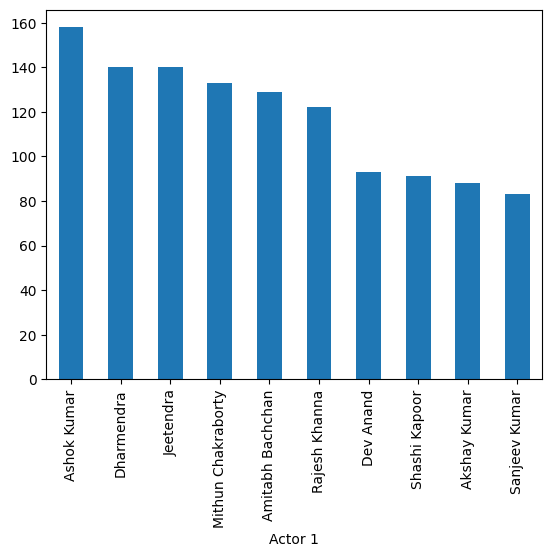

In [99]:
plt.figure(figsize=(20,20))
ax=plt.subplots(1,1)
movies['Actor 1'].value_counts().nlargest(10).plot(kind='bar')
plt.show()

In [100]:
movies.loc[movies['Director'].isnull()].head(50)

,Name,Year,Duration_in_mint,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
48,2 GB Ki Life,1991,128,Drama,6,35,NaN,NaN,NaN,NaN
195,Aadarsh,1983,128,Drama,6,35,NaN,NaN,NaN,NaN
267,Aahwan,1996,128,Action,6,35,NaN,NaN,NaN,NaN
268,Aai Bahar,1946,128,Drama,6,35,NaN,NaN,NaN,NaN
313,Aaj Ki Pukar,1976,128,Drama,6,35,NaN,NaN,NaN,NaN
319,Aaj Watan Ne Humen Pukara,1968,128,Drama,6,35,NaN,NaN,NaN,NaN
322,Aaja Meri Bahon Mein,2002,128,Romance,6,35,NaN,NaN,NaN,NaN
355,Aakhri Muqabla,1978,128,Action,6,35,NaN,NaN,NaN,NaN
365,Aakrandan,2001,128,Drama,6,35,NaN,NaN,NaN,NaN
419,Aao Baby Pyar Karen,1983,128,Romance,6,35,NaN,NaN,NaN,NaN


In [101]:
movies.dropna(how='any',inplace=True)
movies



,Name,Year,Duration_in_mint,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991,128,Drama,6,35,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",6,35,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,6,35,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15502,Zulm Ki Pukar,1979,128,Action,6,35,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,128,Action,4,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,"Action, Drama",4,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


**Remove Duplicated rows**

In [102]:
duplicate = movies[movies.duplicated(subset = ['Name', 'Year', 'Genre','Director', 'Actor 1', 'Actor 2', 'Actor 3'], keep = False)]
duplicate

,Name,Year,Duration_in_mint,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
953,Amrit,1941,153,Drama,6,35,Master Vinayak,Dada Salvi,Baburao Pendharkar,Lalita Pawar
954,Amrit,1941,162,Drama,6,35,Master Vinayak,Dada Salvi,Baburao Pendharkar,Lalita Pawar
4722,First Time - Pehli Baar,2009,128,Drama,6,35,Raja Bundela,Zeenat Aman,Nitin Arora,Raj Babbar
4723,First Time - Pehli Baar,2009,128,Drama,6,35,Raja Bundela,Zeenat Aman,Nitin Arora,Raj Babbar
7407,Kathor,2018,110,Drama,5,10,Karan Kashyap,Lalit Parimoo,Sheetal Dimri,Abhisek Pandey
7408,Kathor,2018,128,Drama,6,35,Karan Kashyap,Lalit Parimoo,Sheetal Dimri,Abhisek Pandey
13307,Slumdog Karodpati,2019,118,Thriller,6,35,Rajesh Patole,Udhav Garje,Rahul Gavane,Govindrao
13308,Slumdog Karodpati,2019,118,Thriller,6,35,Rajesh Patole,Udhav Garje,Rahul Gavane,Govindrao


In [103]:
movies.drop_duplicates(['Name', 'Year', 'Genre','Director', 'Actor 1', 'Actor 2', 'Actor 3'],inplace=True)
movies.shape

(12361, 10)

In [104]:
movies.duplicated().sum()

0

* Lets check how much data is removed

In [105]:
print('Original data has 15509 rows :')
print('After cleaning',15509-movies.value_counts().sum(),'Rows are removed')

Original data has 15509 rows :
After cleaning 3148 Rows are removed


## Data Analysis/Visulization

In [106]:
movies.columns

Index(['Name', 'Year', 'Duration_in_mint', 'Genre', 'Rating', 'Votes',
       'Director', 'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

Text(0, 0.5, 'Genre')

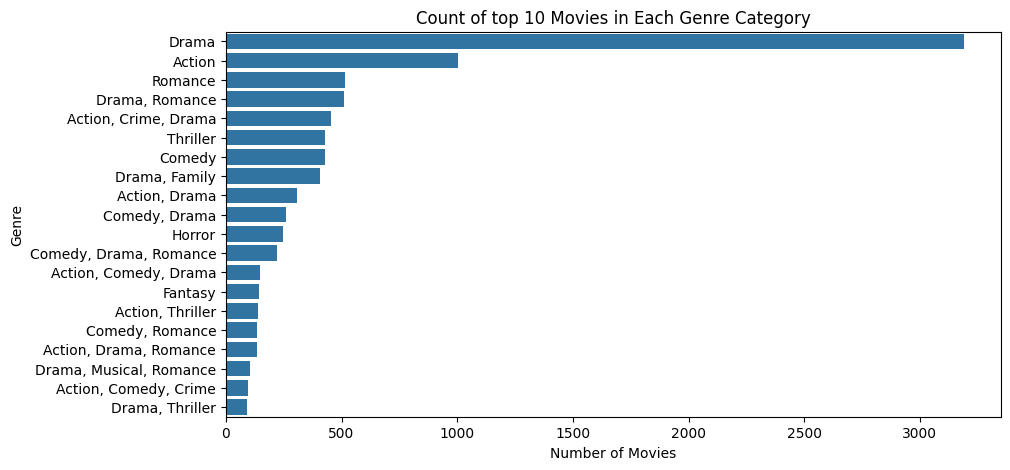

In [107]:
plt.figure(figsize=(10, 5))
genre_counts = movies['Genre'].value_counts().nlargest(20)
sns.barplot(y=genre_counts.index, x=genre_counts.values)
plt.title('Count of top 10 Movies in Each Genre Category')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')



Text(0, 0.5, 'Frequency')

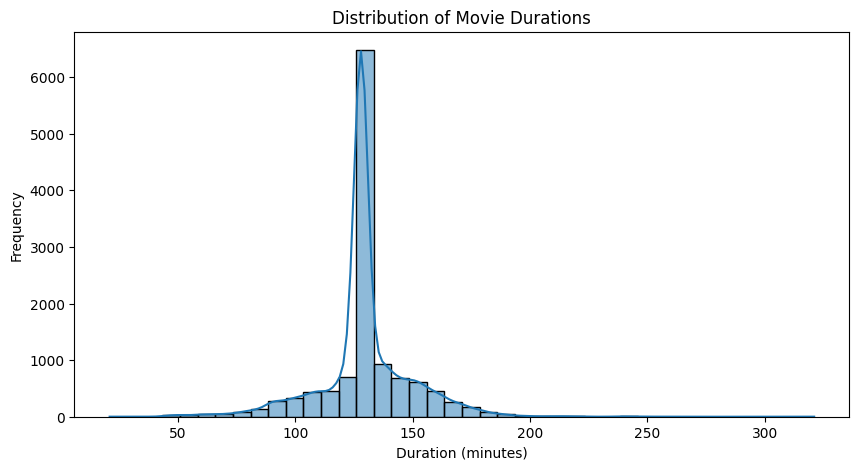

In [108]:
plt.figure(figsize=(10, 5))
sns.histplot(movies['Duration_in_mint'],bins=40,kde='True')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

C:\Users\USER\AppData\Local\Temp\ipykernel_7592\3703320479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=director_counts.index, x=director_counts.values, palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_7592\3703320479.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=actor_counts.index, x=actor_counts.values, palette='viridis')


Text(0, 0.5, 'Actors')

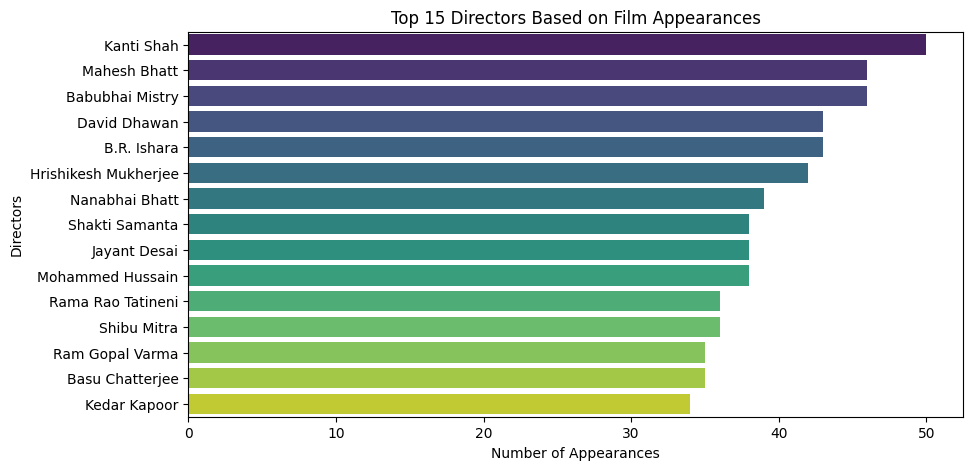

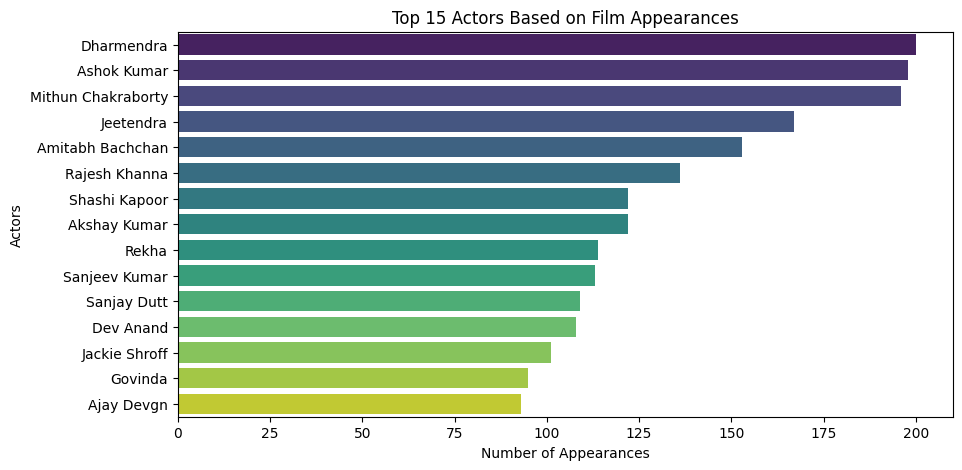

In [109]:
plt.figure(figsize=(10,5))
director_counts = movies['Director'].value_counts().nlargest(15)
sns.barplot(y=director_counts.index, x=director_counts.values, palette='viridis')
plt.title('Top 15 Directors Based on Film Appearances')
plt.xlabel('Number of Appearances')
plt.ylabel('Directors')

actors_combined = pd.concat([movies['Actor 1'], movies['Actor 2']])
actor_counts = actors_combined.value_counts().nlargest(15)

plt.figure(figsize=(10,5))
sns.barplot(y=actor_counts.index, x=actor_counts.values, palette='viridis')
plt.title('Top 15 Actors Based on Film Appearances')
plt.xlabel('Number of Appearances')
plt.ylabel('Actors')

Text(0, 0.5, 'Rating')

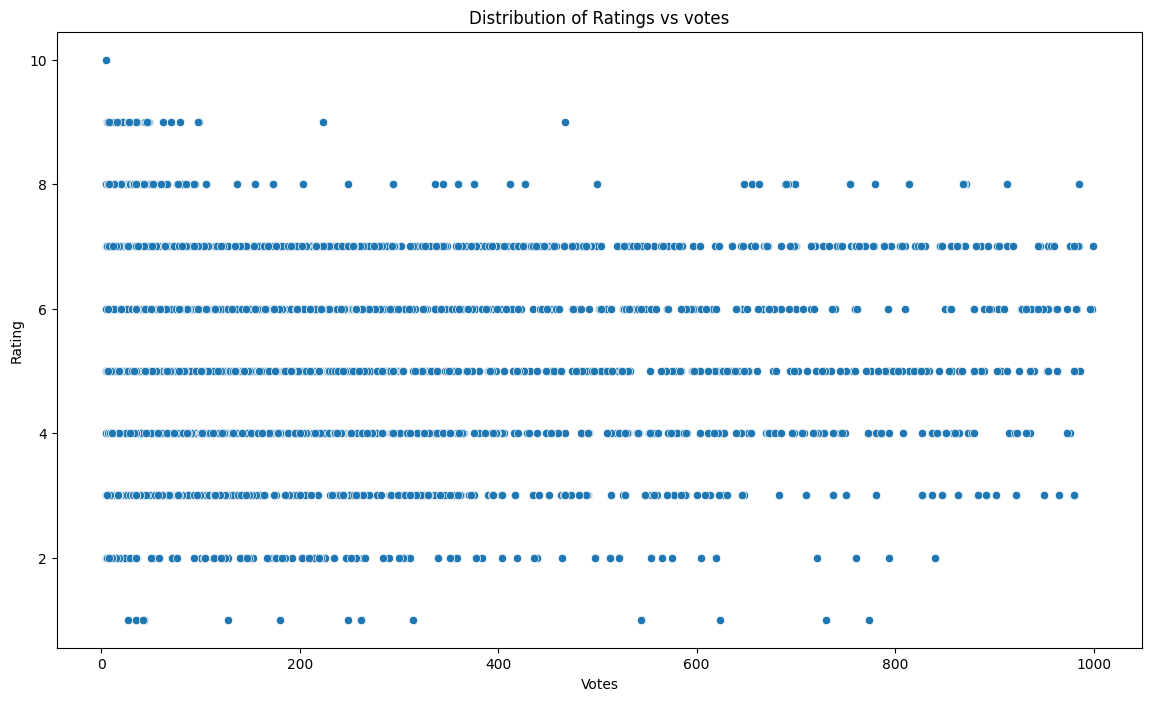

In [110]:
plt.figure(figsize=(14, 8))
sns.scatterplot(movies, x='Votes', y='Rating')
plt.title('Distribution of Ratings vs votes')
plt.xlabel('Votes')
plt.ylabel('Rating')

In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Selecting relevant features for the model
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = movies[features]
y = movies['Rating'].astype(float)

# Handling categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features)
    ])

# Creating a pipeline that first preprocesses the data and then applies a linear regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Output the mean squared error
print('Mean Squared Error:', mse)

Mean Squared Error: 6.720176948620396
